# MNIST Klassifikation
In diesem Notebook erstellen wir ein einfaches Neuronales Netzwerk mithilfe von pytorch um den MNIST Datensatz zu Klassifizieren. Dabei gehen wir entsprechend der [good practice des Deep Learning nach Kaparthy](https://karpathy.github.io/2019/04/25/recipe/) vor.

1. Data Exploration
2. Model & Traininsloop erstellen
3. Evaluieren
4. Overfitten
5. Regularisieren
6. Optimieren

## 1. Data Exploration

Als erstes werden wir die Daten erkunden, um wertvolle Erkenntnisse aus den vorliegenden Daten zu gewinnen. Dabei werden wir verschiedene Analysetechniken und Visualisierungsmethoden einsetzen, um ein umfassendes Verständnis des Datensatzes zu entwickeln. Ziel ist es, Muster, Trends und Zusammenhänge innerhalb der Daten zu identifizieren und darauf aufbauend fundierte Entscheidungen treffen zu können, zB welche Informationen den Daten entnommen werden können und welches Modell sich dazu eignet.

Zunächst laden wir die standardmässig verwendeten Module und den Datensatz.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

# Lade den MNIST-Datensatz
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

Die Inputdaten befinden sich nun in


```
mnist.data
```
 Die Klassenlabel in

 ```
 mnist.target
 ```


### Aufgabe 1.1
### Welches Format haben die Daten?
Wir betrachten das Format der Daten. Bestimmen Sie dazu
1. die Grösse des Datensatzes: N_data
2. die Dimension der einzelnen Input-Daten: size_input
3. den Container des Input Daten: container_input
4. den Input datentyp: dtype_input
5. den Datentyp der Label: dtype_output
6. den Wertebereich der Input-Daten: mini, maxi
7. die möglichen Outputwerte: labels_list

In [8]:
import numpy as np

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

# Grösse des Datensatzes
N_data, size_input = mnist.data.shape
# Input container
container_input = type(mnist.data[0])
# Datentypen
dtype_input = container_input.dtype
dtype_output = type(mnist.target[0])
# Wertebereich
mini, maxi = mnist.data.min(), mnist.data.max()
labels_list = np.unique(mnist.target)

##############################################
##############################################
##############################################



print("Format des Datensatzes:")
print("Anzahl Datenpunkte:", N_data)
print("Dimension der Input Daten:", size_input)
print("Input Container:", container_input)
print("Input Datentyp:", dtype_input)
print("Output Datentyp:", dtype_output)
print("Input Wertebereich:", f"[{mini},{maxi}]")
print("Output Werte:", f"{labels_list}")

Format des Datensatzes:
Anzahl Datenpunkte: 70000
Dimension der Input Daten: 784
Input Container: <class 'numpy.ndarray'>
Input Datentyp: <attribute 'dtype' of 'numpy.ndarray' objects>
Output Datentyp: <class 'str'>
Input Wertebereich: [0,255]
Output Werte: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Welche Daten enthält der Datensatz?

Nun betrachten wir ein paar Datenbeispiele. Bei den Daten handelt es sich um Bilder mit einem string label. Wir plotten ein paar dieser Bilder zusammen mit deren Label.

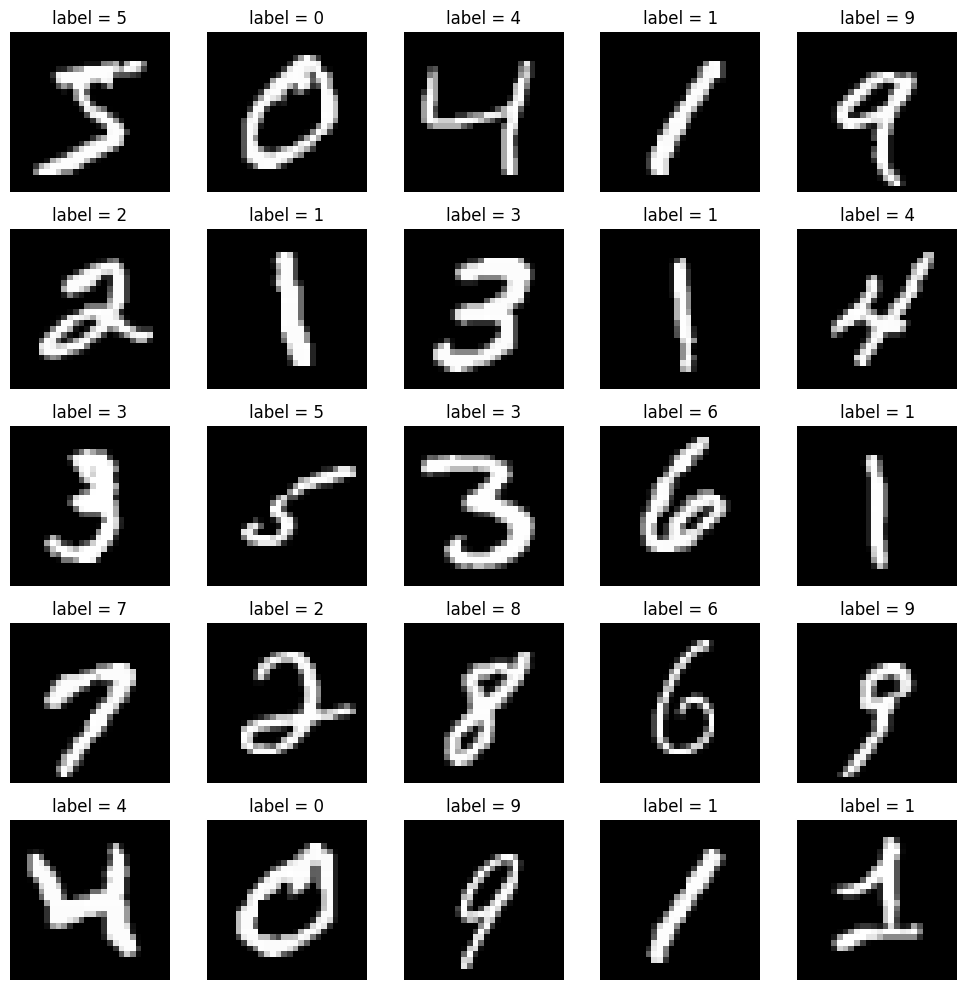

In [9]:
import matplotlib.pyplot as plt

# Plot 25 example images with labels as titles
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(mnist.data[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"label = {mnist.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()



Welche Daten sind im Datensatz enthalten?

### Aufgabe 1.2
### Welche Klassen gibt es und wie sind diese Verteilt?
Nun betrachten wir die Verteilung der Klassen. Berechnen und plotten Sie dazu das Histogram der Label.

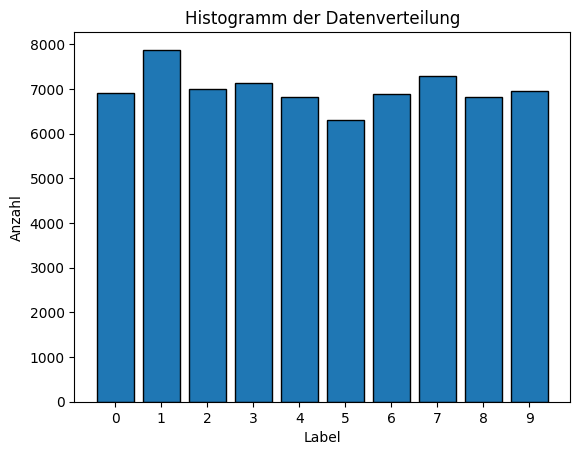

In [11]:
import numpy as np
import matplotlib.pyplot as plt


##############################################
############ ENTER YOUR CODE HERE ############
##############################################

# NumPy Histogramm-Berechnung
counts = np.bincount(mnist.target.astype(int))

##############################################
##############################################
##############################################


# Histogramm-Plot
plt.bar(labels_list, counts, edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Anzahl')
plt.title('Histogramm der Datenverteilung')
plt.show()



### Aufgabe 1.3
### Wie machen wir die Klassen dem Model verständlich?
Die Label Information liegt als String vor. Ein Neuronales Netz arbeitet jedoch in aller Regel nur mit Floats.
Ein einfaches übersetzen der Strings in die Floatwerte 0 - 9 hätte zur Folge, dass zB ein Output von 4 näher am Zielwert 5 läge als ein Output von 1. Die 4 ist der 5 aber nicht ähnlicher als die 1.
Es ist daher sinnvoll, jedes mögliche Label durch einen eigenen Floatwert 0 - 1 darzustellen, zB 3 -> [0,0,0,1,0,0,0,0,0,0].
Dieser Vorgang heisst **One-Hot-Encoding** und sorgt für die saubere Trennung der Label. Ausserdem erlaubt dieses Vorgehen mit Labeln zu arbeiten, die keine Zahlenwerte sind, wie zB "Hund", "Katze", "Maus".

Überführen Sie nun die Targetlabel in das One-Hot-Encoding Format.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

# One-Hot-Encoding der Labels
encoder = OneHotEncoder()
labels = ...

##############################################
##############################################
##############################################


print("Shape der One-Hot-Encdoded Labels:", labels.shape)

Die shape der labels sollte nun (70000, 10) sein.

### Aufgabe 1.4
### Welche Skalierung der Daten ist sinnvoll?
Die Input Werte sind zwar schon im float Format, allerdings skalieren Sie von 0-255. Die Erfahrung zeigt, dass Neuronale Netze am besten mit Werten zwischen -1 und 1 bzw zwischen 0 und 1 arbeiten.

Reskalieren Sie die Input Daten mithilfe des Min-Max Scaling:
$$scaled\_data = \frac{{data - \min(data)}}{{\max(data) - \min(data)}} \cdot 2 - 1
$$

In [ ]:
import numpy as np

# Skalierung der Bilddaten auf [-1, 1]
mini, maxi = np.min(mnist.data), np.max(mnist.data)
print("Min/Max vor Skalierung:", mini, maxi)

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

scaled_data = ...

##############################################
##############################################
##############################################

print("Min/Max nach Skalierung:", np.min(scaled_data), np.max(scaled_data))
